# Study In Randomness and Monte Carlo Integration

## Introduction/Overview

Random sequences created by computers are psuedo-random meaning that the generation of random numbers put out by a computer is based on an deterministic process rather than a completely random one. Random seqences  are very useful in simluated experiments(due to their recreateability) and in monte carlo integration.

# Exercise  1

In [1]:
#code
%pylab inline
def rng(seed,npts):
    a = 427419669081
    m = 999999999989
    x = seed
    results = empty(npts)
    for i in range(npts):
        results[i] = x/m
        x = (a*x)%m
    return results
def randu(seed,npts):
    a = (2**16) + 3
    m = (2**31)
    x = seed
    results = empty(npts)
    for i in range(npts):
        results[i] = x/m
        x = (a*x)%m
    return results

Populating the interactive namespace from numpy and matplotlib


For the function rng we are creating an array of large numbers so that the likelyhood of repeating a number is much less.

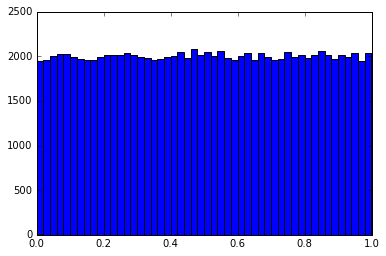

In [4]:
hist(randu(100,100000),bins= 50);

Now by ploting the histogram can see that the random number generation of randu is quite random
the fact the the histogram is close to  completely flat is an acurate indication that the function if a pretty good random number generator, because all of the values are unifomly likely. This is similar for the following histograms and functions.

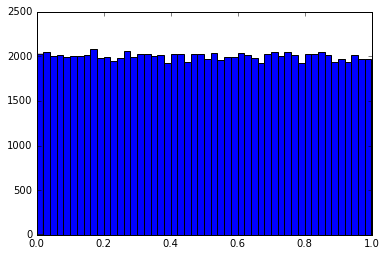

In [5]:
hist(rng(100,100000),bins = 50);

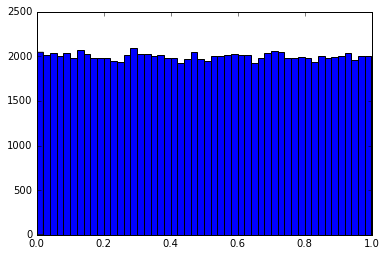

In [6]:
hist(rand(100000),bins = 50);

# Exercise 2

## Monte Carlo Integration

In this excercise we random number generation to preform monte carlo integration. Monte carlo integration can be used to evaluate definite integrals for unknown functions. The process consists of suming up random values in an known sample area then comparing the number of points in inside the function to the number of points outside the function. 

In [7]:
#code
from mystery import mysteryf

In [8]:
rand(100)*5;

In [9]:
ave1 = mean(mysteryf(rand(100)))

In [10]:
ave2 = mean(mysteryf(rand(100)))

In [11]:
ave3 = mean(mysteryf(rand(100)))

In [12]:
div = 10000
mean(sum(mysteryf(rand(div)))/div)

0.32346321353871488

THIS is the average value of the mysteryf. Then if you mulitply the avrage value of the funtion by the length of the interval then we should get a rough value of the area of mysteryf.

In [13]:
mean(sum(mysteryf(rand(div)))/div)*5

1.6920480395995101

(0, 1)

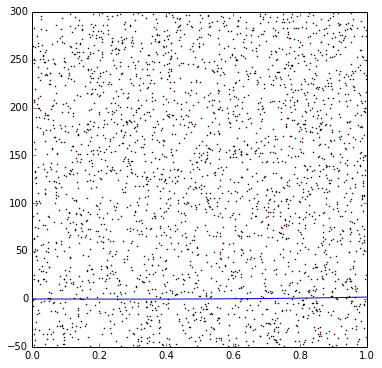

In [14]:
figure = figsize(6,6)
z = linspace(0,5,400)
plot(z,mysteryf(z))

x,y = (rand(2,1000000)*350-50)
plot (x,y,'ro', ms = 1)
xlim(0,1)

#plot(x,mysteryf(len(rand(x))),'o');
#plot (rand(mysteryf(x)),"o")


# Exercise 3

** Monte Carlo Integration with a polar curve. 

We continue with Monte Carlo integration but this time with an actual image of a function and a polar curve.

In [15]:
def r(theta):
    return (2 + cos(7*theta))

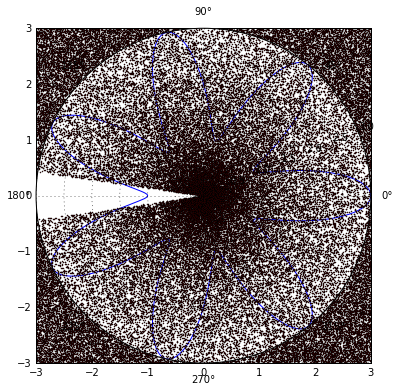

In [16]:
figure = figsize(6,6)
theta = linspace(0,2*pi,400)
x,y = (rand(2,100000)*6-3)
plot (x,y,'ro', ms = 1)
polar(theta,r(theta))# generates plots in polar coordinates
plot (x,y,'ro', ms = 1)


In [17]:
theta=arctan2(y,x)
radius = hypot(x,y)
area_box = 36
hits = sum(radius <(2+cos(7*theta)))
area_flower = area_box*(hits/100000)
print(area_flower)

14.11308


So in this integration we are going to create a bounding box or a domain where the random values will exist the better the fit of the bounding box the better the monte carlo approximation. 
For integration there will be points both in the flower and outside the flower so then using probaility we can know the area of the flower.
 
It is known that $$Probaility = \frac{part}{whole}$$
so if the the to total area of the box will correspond to the probability of the a point being with in the function and can be expressed as:

$$Area(flower) =  area(box) *\frac {points (flower)}{total points}$$

In terms of regular integration then area of the flower is $$\frac{1}{2}\int_{0}^{2\pi}r^2d\theta = \int_{0}^{2\pi}(2 + cos(7\theta))^2d\theta =14.14 $$


As you can see the results of the of the monte Carlo integration With the square is quite acurate so, our result is around 14.2 and our actual is about 14.14 so with a large number of points Monte Carlo is fairly acurate for a box.

# Exercise 4

## Baseball with Monte Carlo Simulation

In this exercise we use Monte Carlo Simulation. Which is a method for propagating uncertainties in model imputs into a model outputs. 

A simulation of a system which uses random sampling of the input parameters to create a probability distribution of possible outcomes. 

Bernoulli random numbers Its the result of an event with only two posible outcomes: success or failure.For example a coin: heads = success and tails = failure. 

So then from a probaility theroy perspective P(success) = p, P(failure) = 1-p = q.

In [18]:
hits = random.rand(100)<.29
print (hits)
mean(hits)
sum(hits)

[ True False  True False False False  True False False  True False False
 False False False False False False  True  True False False  True False
 False False  True  True False False  True  True  True  True  True False
 False False False  True False False False False False False False  True
  True False False False False  True False False False False False False
 False  True False False  True False False False False False False False
 False False  True False  True False  True False False  True False  True
 False False False  True False False False  True False  True False False
 False False  True False]


29

In [19]:
ntrials = 5000
swings = random.rand(100,ntrials)
hits = swings <.29
#print(Thits)
Thits = sum(hits, axis = 0)
mean(Thits==29)

0.089599999999999999

# Exercise 5

## Central Limit Theorem 

States that the sum of and sequence of independent and identically distrubuted random variable converges to a gaussian distribution as the number of value the random variable can take increases. Basically for very large sample sizes the distubtion of values is gaussian.

C:\Users\ETR\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


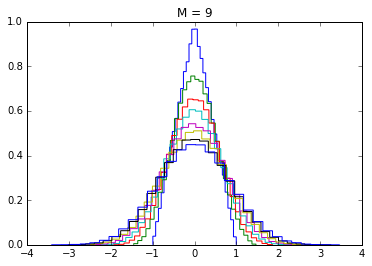

In [2]:
npts1 = 100000
#figure(figsize=(15,3))
for M in range(2,10):
    Msums = sum(rand(M,npts1),axis = 0)
    #subplot(1,5,M-1)
    hist(Msums - (M/2) , bins = 30, normed = True, histtype = "step")
    legend()
    title("M = {}".format(M))
    title("M = {}".format(M))
    #xlim(-2,2)
    

In [3]:
# Pobability density function  let  v be a random number. A pdf  is a function such that P(v)
#1)p( v)>0
#2po

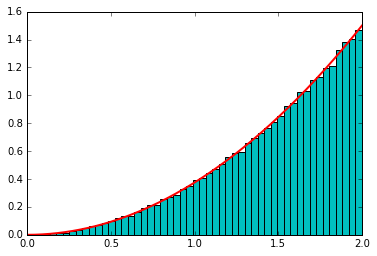

In [4]:
u = rand(100000)
v = 2*u**(1./3)
hist(v,normed = True, bins = 50, fc = 'c');
x = linspace(0,2,400)
y = .375*x**2
plot (x,y,'r',lw = 2)

In this next case let $p(v) = 5v^8$ so then:

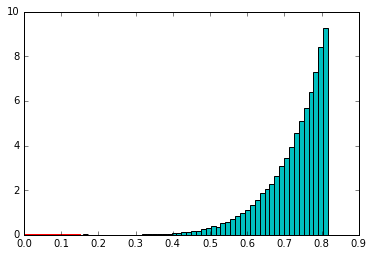

In [5]:
u = rand(100000)
v = ((1/5)*u)**(1./8)
hist(v,normed = True, bins = 50, fc = 'c');
x = linspace(0,.15,400)
y = 5*x**8
plot (x,y,'r',lw = 2)

C:\Users\ETR\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


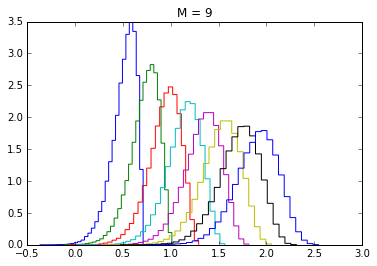

In [6]:
npts1 = 100000
#figure(figsize=(15,3))
for M in range(2,10):
    Msums = sum(((1/5)*rand(M,npts1))**(1./8),axis = 0)
    #subplot(1,5,M-1)
    hist((Msums - (M/2))/((1/5)*M)**(1./8) , bins = 30, normed = True, histtype = "step")
    legend()
    title("M = {}".format(M))
    title("M = {}".format(M))
    #xlim(-2,2)

Though I wasn't able to center the graphs it is obvious that there is a convergence to the normal distribution.

# Exercise 6

s(t+1) = (1+$\mu$ + $\sigma$$\epsilon$)s(t)

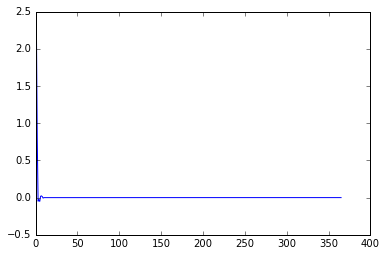

In [22]:
mu = 0.0
sigma = 1.10
tmax = 366
s = 1
results = empty (tmax)
results [0]= s
for t in range(1,tmax):
    s *= 1 + mu +sigma*randn()
    #subplot (1,5,6)
    results[t]= s
plot(results)
     
#plot(x**(1/2) +1)
#plot(-x**(1/2) +1)

In [23]:
hypot(366,results[365])

366.0

In [24]:
results[365]

-1.3358053737905033e-40

Use an nstock variable

C:\Users\ETR\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: RuntimeWarning: invalid value encountered in true_divide


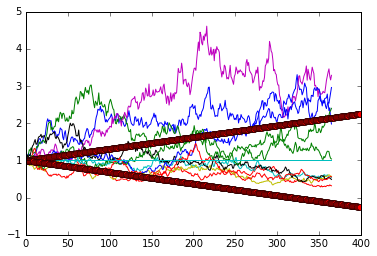

In [19]:
nstocks = 10
mu = 0.0
sigma = 0.05
tmax = 366
s = ones(nstocks)
results = empty([tmax,nstocks])
results [0]= s
for t in range(1,tmax):
    s *= 1 + mu +sigma*randn(nstocks)
    results[t]= s
plot(results);
x = linspace(0,365,400)
z = linspace(0,5,400)
plot(x,x/x)
plot(.25*z +1,'ro')
plot(-.25*z +1,'ro')

In [10]:
final = results[:,-1]

0.73189083363534169

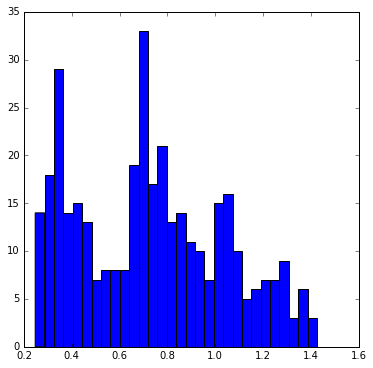

In [89]:
hist(final,bins = 30);
mean(final)

In [115]:
x = []
y = []
for j in results[:,-1]:
    if  j > 1:
        y.append(j)
print("win",len(y))
for i in results[:,-1]:
    if i < 1:
        x.append(i)
print("loss",len(x))

len(results[:,-1])
pwin = len(y)/len(results[:,-1])
ploss = len(x)/len(results[:,-1])
print("probapility of win",pwin)
print("probility of loss",ploss)

win 82
loss 283
probapility of win 0.22404371584699453
probility of loss 0.773224043715847


C:\Users\ETR\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: RuntimeWarning: invalid value encountered in true_divide


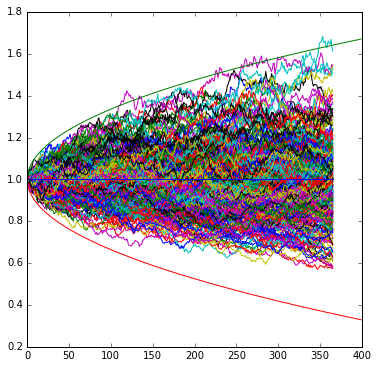

In [40]:
nstocks = 322
mu = 0.0
sigma = 0.01
tmax = 366
s = ones(nstocks)
results1 = empty([tmax,nstocks])
results1[0]= s
for t in range(1,tmax):
    s *= 1 + mu +sigma*randn(nstocks)
    results1[t]= s
plot(results1);
x = linspace(0,365,400)
plot(x,x/x)
plot(.3*z**(1/2) +1)
plot(-.3*z**(1/2) +1)

0.98542986424629353

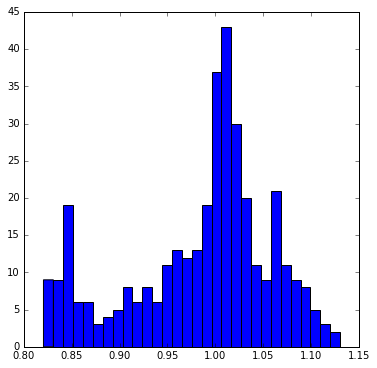

In [92]:
final1 = results1[:,-1]
hist(final1,bins = 30);
mean(final1)

If you let the volitility become zero the average of the final value of the stock price is completely 1 (if all the stocks start at 1) by increasing the volitility we create a larger amount of deviation from the value 1. 